In [446]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [447]:
data = pd.read_csv('data.csv')

In [448]:
data.head(3)

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28


In [449]:
data = data[data['age'] <= 90] 

In [450]:
score_contribution = {
    'Q1': 1, 'Q2': 1, 'Q3': 1, 'Q4': 2, 'Q5': 2,
    'Q6': 1, 'Q7': 2, 'Q8': 1, 'Q9': 2, 'Q10': 2,
    'Q11': 1, 'Q12': 1, 'Q13': 1, 'Q14': 1, 'Q15': 2,
    'Q16': 1, 'Q17': 2, 'Q18': 2, 'Q19': 2, 'Q20': 2,
    'Q21': 1, 'Q22': 2, 'Q23': 2, 'Q24': 1, 'Q25': 1,
    'Q26': 2, 'Q27': 1, 'Q28': 2, 'Q29': 1, 'Q30': 1,
    'Q31': 1, 'Q32': 2, 'Q33': 1, 'Q34': 1, 'Q35': 2,
    'Q36': 1, 'Q37': 1, 'Q38': 1, 'Q39': 1, 'Q40': 2
}

for question, contrib in score_contribution.items():
    data[question] = data[question].apply(lambda x: 1 if x == contrib else 0)

In [451]:
gender_map = {1: 'male', 2: 'female', 3: 'other', 0: 'none'}
data['gender'] = data['gender'].map(gender_map)

In [452]:
gender_score_mean = data.groupby('gender')['score'].mean()
print(gender_score_mean)

gender
female    12.078102
male      14.197260
none      11.916667
other     14.564103
Name: score, dtype: float64


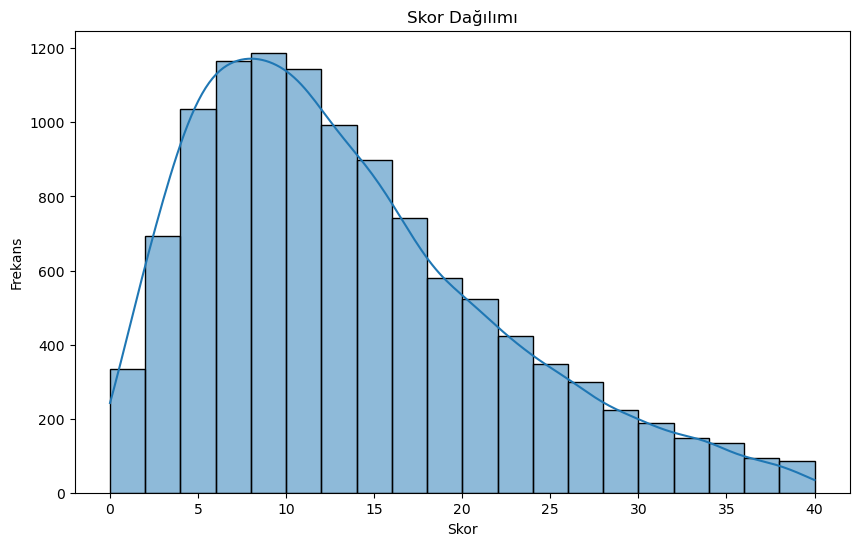

In [453]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.xlabel('Skor')
plt.ylabel('Frekans')
plt.title('Skor Dağılımı')
plt.show()

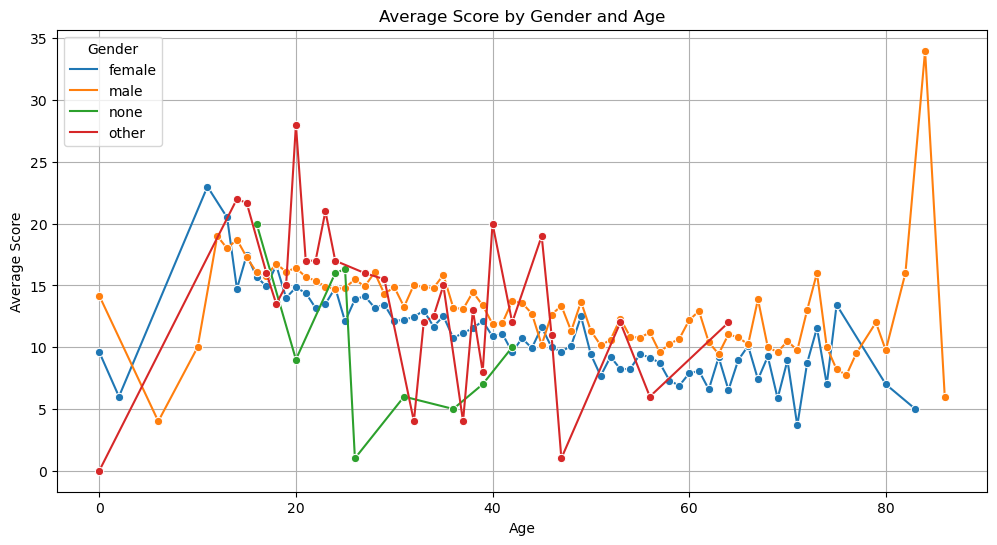

In [454]:
gender_age_score_mean = data.groupby(['gender', 'age'])['score'].mean().unstack()
gender_age_score_mean_long = gender_age_score_mean.reset_index().melt(id_vars='gender', value_name='mean_score')

plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_age_score_mean_long, x='age', y='mean_score', hue='gender', marker='o')

plt.title('Average Score by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

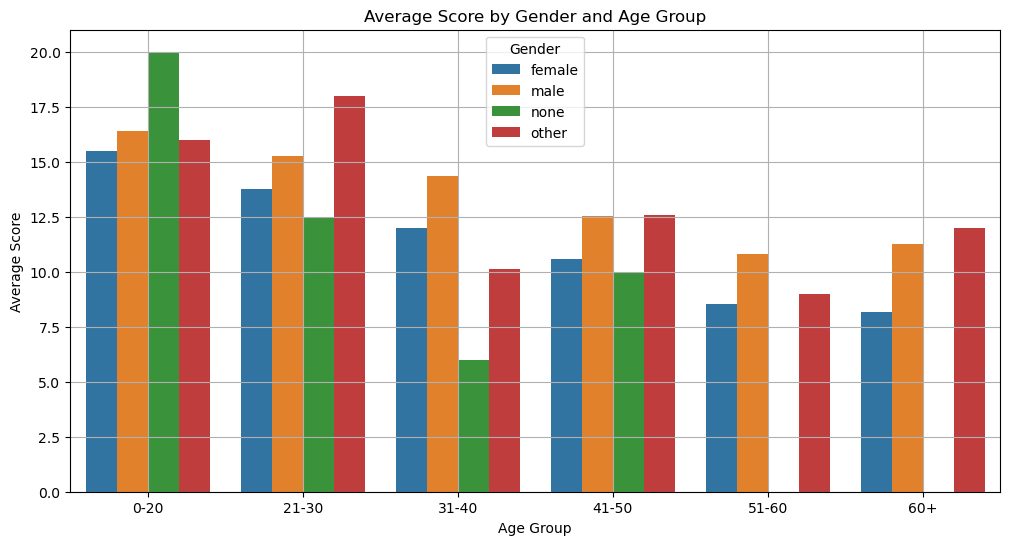

In [455]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

gender_age_group_score_mean = data.groupby(['gender', 'age_group'])['score'].mean().unstack()

gender_age_group_score_mean_long = gender_age_group_score_mean.reset_index().melt(id_vars='gender', value_name='mean_score')

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_age_group_score_mean_long, x='age_group', y='mean_score', hue='gender')

plt.title('Average Score by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [456]:
reverse_gender_map = {'male': 1, 'female': 2, 'other': 3, 'none': 0}
data['gender'] = data['gender'].map(reverse_gender_map)

In [457]:
questions = [f'Q{i}' for i in range(1, 41)]
demographics = ['gender', 'age']

X = data[questions + demographics]
y = data['score']


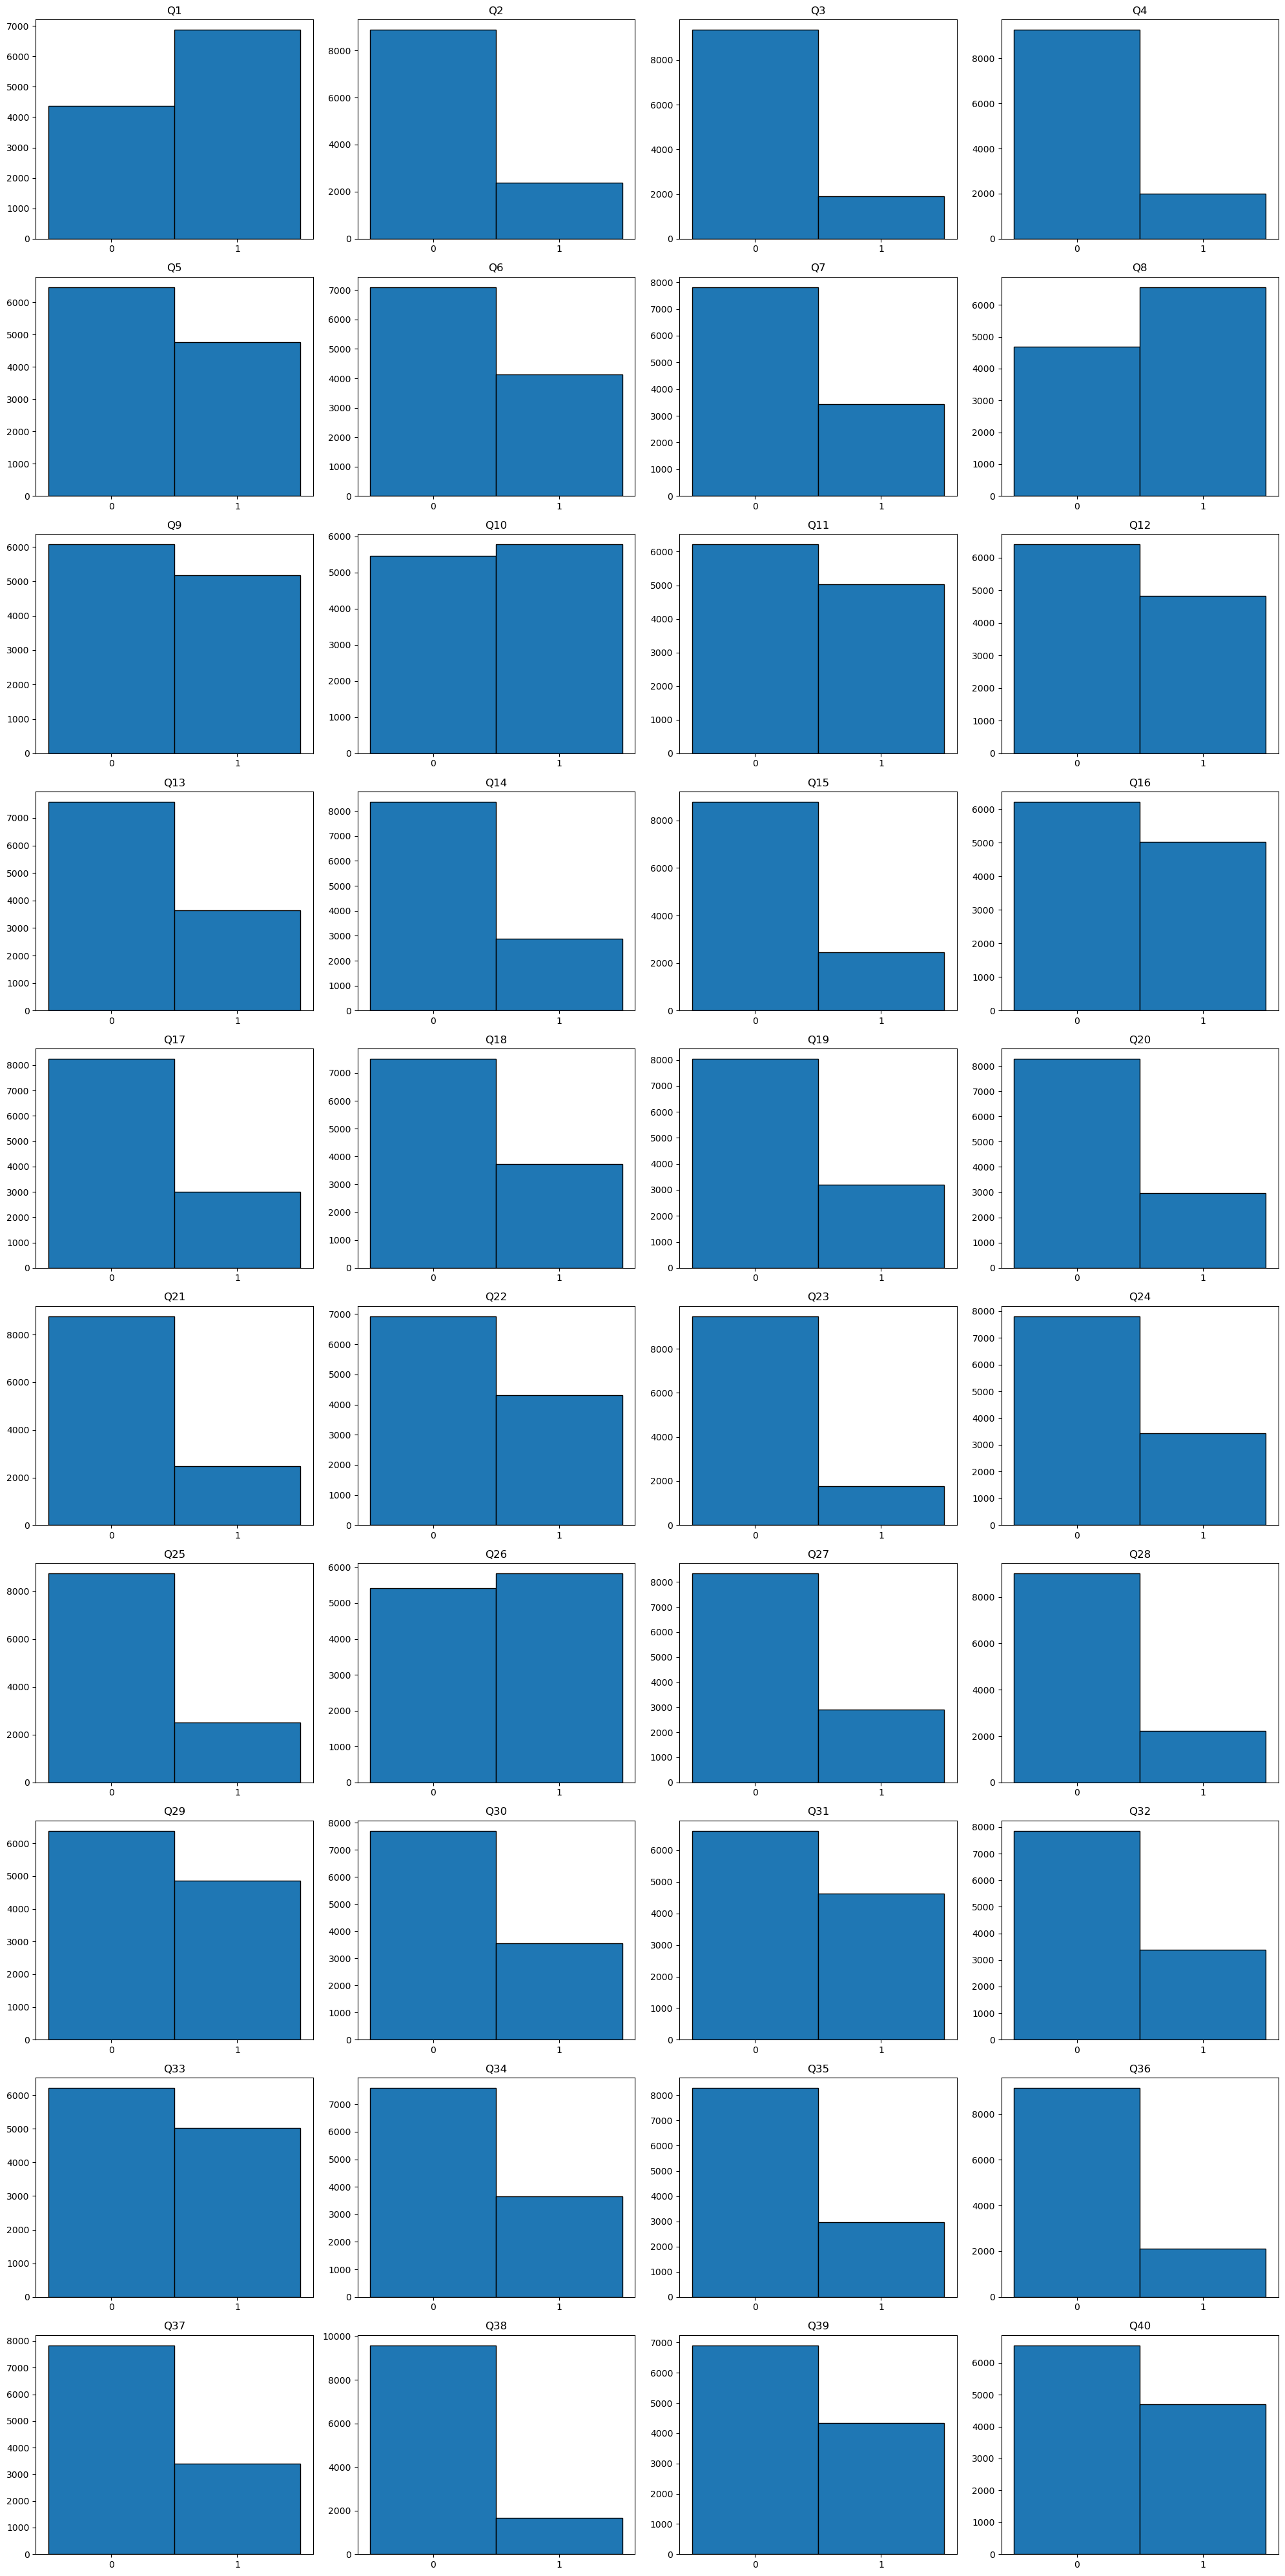

In [458]:
fig, axs = plt.subplots(10, 4, figsize=(20, 40))

for i, question in enumerate(questions):
    row = i // 4
    col = i % 4
    axs[row, col].hist(data[question], bins=[-0.5, 0.5, 1.5], edgecolor='black')
    axs[row, col].set_title(question)
    axs[row, col].set_xticks([0, 1])
    axs[row, col].set_xticklabels(['0', '1'])

plt.tight_layout()
plt.show()

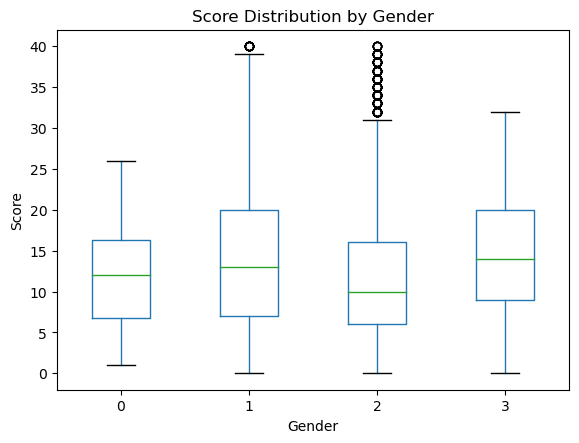

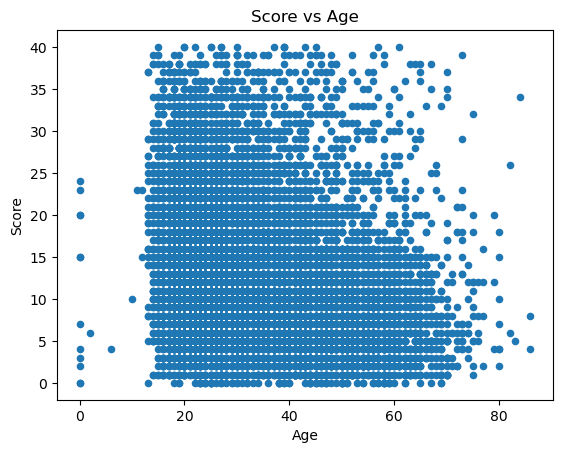

In [459]:
data.boxplot(column='score', by='gender', grid=False)
plt.title('Score Distribution by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.show()

data.plot.scatter(x='age', y='score')
plt.title('Score vs Age')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()


In [460]:
correlation_matrix = data.corr()
print(correlation_matrix['score'].sort_values(ascending=False)[:11])


score    1.000000
Q27      0.605522
Q40      0.574708
Q36      0.571339
Q35      0.567473
Q30      0.564298
Q13      0.559164
Q32      0.556315
Q12      0.542775
Q25      0.534108
Q4       0.532642
Name: score, dtype: float64


In [469]:
data['high_score'] = (data['score'] > 36).astype(int)
question_diffs = {}
for question in questions:
    high_score_1_ratio = data[data['high_score'] == 1][question].mean()
    low_score_1_ratio = data[data['high_score'] == 0][question].mean()
    diff = abs(high_score_1_ratio - low_score_1_ratio)
    question_diffs[question] = diff

sorted_question_diffs = sorted(question_diffs.items(), key=lambda item: item[1], reverse=True)[:10]

print("En fazla ayrıştırıcı ilk 10 soru ve farkları:")
for question, diff in sorted_question_diffs:
    print(f'{question}: Fark = {diff}')

En fazla ayrıştırıcı ilk 10 soru ve farkları:
Q38: Fark = 0.8540998217468806
Q23: Fark = 0.8437611408199643
Q3: Fark = 0.8327094474153298
Q4: Fark = 0.8245989304812834
Q36: Fark = 0.8137254901960784
Q28: Fark = 0.8029411764705883
Q2: Fark = 0.7901960784313725
Q15: Fark = 0.7827985739750446
Q21: Fark = 0.7811942959001783
Q25: Fark = 0.7783422459893048


In [462]:
data['high_score'] = (data['score'] > 36).astype(int)
question_diffs = {}
for question in questions:
    high_score_1_ratio = data[data['high_score'] == 1][question].mean()
    low_score_1_ratio = data[data['high_score'] == 0][question].mean()
    if low_score_1_ratio > 0: 
        diff = high_score_1_ratio / low_score_1_ratio
    else:
        diff = 0  
    question_diffs[question] = diff

sorted_question_diffs = sorted(question_diffs.items(), key=lambda item: item[1], reverse=True)[:10]

print("En fazla ayrıştırıcı ilk 10 soru ve farkları:")
for question, diff in sorted_question_diffs:
    print(f'{question}: Fark = {diff}')

En fazla ayrıştırıcı ilk 10 soru ve farkları:
Q38: Fark = 6.937321513564969
Q23: Fark = 6.392765036382058
Q4: Fark = 5.605572110139547
Q36: Fark = 5.577363973745553
Q3: Fark = 4.788580560064935
Q21: Fark = 4.6319307026733405
Q25: Fark = 4.569521531100479
Q28: Fark = 4.369294932326094
Q15: Fark = 4.287505677762637
Q2: Fark = 4.249305191928142


In [464]:
sum_of_points_by_high_group = data[data['high_score'] == 1][questions].sum()

top_10_questions = sum_of_points_by_high_group.sort_values(ascending=False).head(15)

print(top_10_questions)

Q1     132
Q13    132
Q39    132
Q5     132
Q6     132
Q32    132
Q30    132
Q27    132
Q10    132
Q26    132
Q12    132
Q36    131
Q40    131
Q9     131
Q8     131
dtype: int64


In [466]:
ratios = {}
for question in questions:
    high_and_ones = data[(data[question] == 1) & (data['high_score'] == 1)].shape[0]
    ones = data[data[question] == 1].shape[0]
    if ones != 0: 
        ratios[question] = high_and_ones / ones
    else:
        ratios[question] = 0

sorted_ratios = sorted(ratios.items(), key=lambda x: x[1], reverse=True)[:10]

In [467]:
sorted_ratios

[('Q38', 0.0761789600967352),
 ('Q23', 0.07062146892655367),
 ('Q4', 0.062468513853904284),
 ('Q36', 0.062173706691979115),
 ('Q3', 0.05385427666314678),
 ('Q21', 0.05218446601941747),
 ('Q25', 0.05151757188498403),
 ('Q28', 0.04937163375224417),
 ('Q15', 0.04849225753871231),
 ('Q2', 0.04808097849008857)]

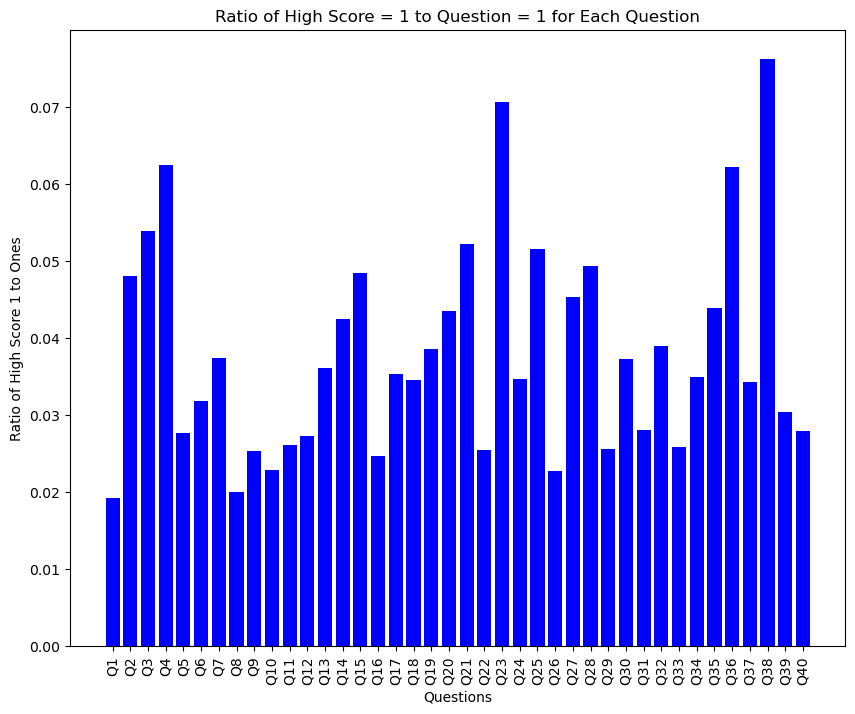

In [468]:
questions = list(ratios.keys())
values = list(ratios.values())

plt.figure(figsize=(10, 8))  
plt.bar(questions, values, color='blue')
plt.xlabel('Questions')
plt.ylabel('Ratio of High Score 1 to Ones')
plt.title('Ratio of High Score = 1 to Question = 1 for Each Question')
plt.xticks(rotation=90)  
plt.show()

## En belirleyici sorular

Q38. 1=I get upset when people don't notice how I look when I go out in public. 2=I don't mind blending into the crowd when I go out in public.

Q23. 1=Sometimes I tell good stories. 2=Everybody likes to hear my stories.

Q4. 1=When people compliment me I sometimes get embarrassed. 2=I know that I am good because everybody keeps telling me so.

Q36. 1=I am a born leader. 2=Leadership is a quality that takes a long time to develop.

Q3. 1=I would do almost anything on a dare. 2=I tend to be a fairly cautious person.

Q21. 1=I always know what I am doing. 2=Sometimes I am not sure of what I am doing.

Q25. 1=I will never be satisfied until I get all that I deserve. 2=I take my satisfactions as they 
come.

Q28. 1=I don't care about new fads and fashions. 2=I like to start new fads and fashions.

Q2. 1=Modesty doesn't become me. 2=I am essentially a modest person.

Q15. 1=I don't particularly like to show off my body. 2=I like to show off my body.


S38. 1=Sokaklara çıktığımda insanlar nasıl göründüğümü fark etmediğinde üzülüyorum. 2=Sokaklara çıktığımda kalabalığa karışmaktan çekinmem.

S23. 1=Bazen güzel hikayeler anlatırım. 2=Herkes hikayelerimi dinlemeyi sever.

S4. 1=İnsanlar bana iltifat ettiğinde bazen utanıyorum. 2=İyi olduğumu biliyorum çünkü herkes bana öyle söylüyor.

S36. 1=Ben doğuştan bir liderim. 2=Liderlik, geliştirilmesi uzun zaman alan bir niteliktir.

S3. 1=Cesaretle neredeyse her şeyi yaparım. 2=Oldukça dikkatli bir insan olma eğilimindeyim.

S21. 1=Ne yaptığımı her zaman biliyorum. 2=Bazen ne yaptığımdan emin değilim.

S25. 1=Hak ettiğim her şeyi alana kadar asla tatmin olmayacağım. 2=Memnuniyetimi geldiği gibi kabul ediyorum.

S28. 1=Yeni moda ve modalar umurumda değil. 2=Yeni moda ve modalara başlamayı severim.

Q2. 1=Tevazu bana göre değil. 2=Aslında mütevazı bir insanım.

S15. 1=Vücudumu özellikle göstermeyi sevmiyorum. 2=Vücudumu göstermeyi severim.